## Road Extraction from Satellite Images Using Deep Learning Techniques
Jasmine Siyu Wu, Yihan Zhang

### Introduction & Propose
Roads are among the most critical and highly invested infrastructures supporting fundamental human movements and stimulating socio-economic development. Accurately knowing the locations of urban and rural roads is crucial for planners to understand human geography and activities. The absence of complete and up-to-date road data can obstruct effective traffic management, economic development, and hazard management. While most contemporary cities and developed countries have made great efforts to build their roads data and street network, and crowdsourcing technologies have complemented many rural roads; underdeveloped countries still lack complete and accurate road network datasets due to limited resources. Therefore, this project aims to employ semantic segmentation of satellite imagery as an alternative method for automated road extraction. Deep neural networks have demonstrated superior image classification and object detection capabilities compared to traditional machine learning algorithms, such as random forest and maximum likelihood classifiers. In this project, we will develop and compare the performances of two deep learning models, U-Net and DeepLabV3+, for road extraction using the DeepGlobe Road Extraction Dataset.

#### Data Description
This study utilizes DeepGlobe Road Extraction Dataset, which was released as a task for the IEEE DeepGlobe Road Extraction Challenge in 2018. The dataset contains 7,460 RGB images with a dimension of 1024 x 1024 pixels, of which 6,226 are used for training and 1,234 are used for testing. All images are accompanied by pixel-level ground-truth labels: road or background, which enable us to run and test object detection models.Yet, due to the nature of this competition, only the training data was provided with labels. In this study, we will split the original training data (6,226) into train/test sets for our own use.

#### Methods
In this project, we plan to use two deep learning models to extract roads from satellite imagery: U-Net and DeepLabV3+, both popular nowadays and the most well-recognized image segmentation algorithms. By modifying the parameters of the two pre-trained models, we intend to improve their performances for road extraction and compare the two models.

**U-Net** is a convolutional network architecture modified and extended to employ data augmentation techniques to make the most of the existing labeled data samples. As the winner in the ISBI cell tracking challenge in 2015, this network is recognized for its fast and precise performances in biomedical image segmentation, such as brain and liver image segmentation. Research has shown the potential of U-Net as a network to take spatial correlation and geometric information into road structure processing [2]. Based on its advantages in data augmentation, we will modify and train this model on satellite images for road detection.

**DeepLabV3+** is a benchmark semantic segmentation model developed upon DeepLabV3 by adding a decoder module [1]. DeepLabV3+ incorporates a spatial pyramid pooling module (dilated convolution) and encode-decoder structure to encode multi-scale contextual information while capturing sharper object boundaries effectively. For problems such as road extraction, which requires high boundary accuracy limited by satellite imagery resolution, DeepLabV3+ is an approach worth exploring.

### 1 Data Loading and Processing

In [12]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Concatenate, UpSampling2D

In [8]:

dir = "Data/train/"


image_paths = sorted(glob.glob(os.path.join(dir, '*.jpg')))
mask_paths = sorted(glob.glob(os.path.join(dir, '*.png')))

images = []
masks = []

size = (256,256)

for img_path, mask_path in zip(image_paths, mask_paths):
    img = cv2.imread(img_path)
    img = cv2.resize(img, size)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, size)

    images.append(img)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)

In [11]:
print("Images shape: ", images.shape)
print("Masks shape: ", masks.shape)

Images shape:  (6226, 256, 256, 3)
Masks shape:  (6226, 256, 256)


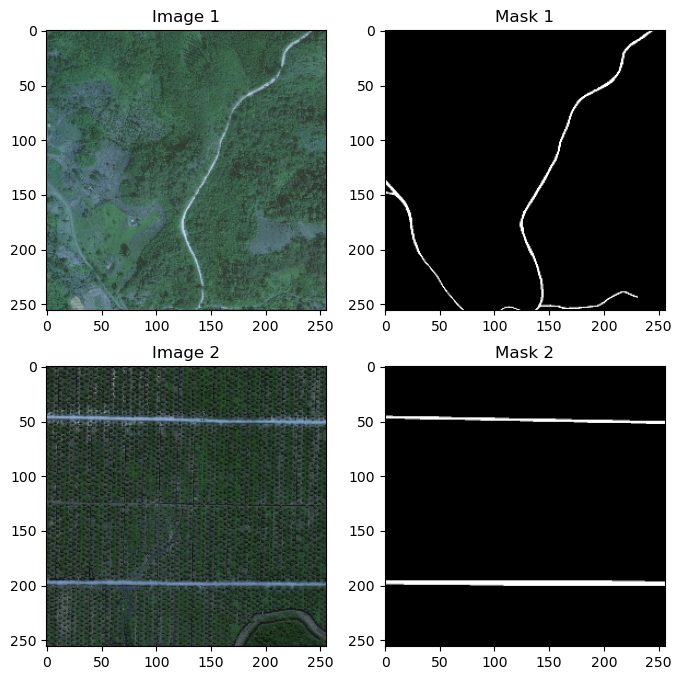

In [18]:
# visualized images and masks

num_images = 2

fig, ax = plt.subplots(num_images, 2, figsize=(8, 8))

for i in range(num_images):
    ax[i, 0].imshow(images[i])
    ax[i, 0].set_title(f"Image {i+1}")

    ax[i, 1].imshow(masks[i], cmap='gray')
    ax[i, 1].set_title(f"Mask {i+1}")

plt.show()

In [19]:
# split data into training and test set
train_ratio = 0.8
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=1-train_ratio, random_state=42)

### UNet

### DeepLabV3+

In [7]:
from official.vision.image_classification.efficientnet import EfficientNetModel
from official.vision.segmentation.deeplab import DeepLabModel

ModuleNotFoundError: No module named 'official.vision.image_classification'

In [20]:
# prepare DeepLabV3+ model

def deeplabv3plus_model(input_shape=(256, 256, 3), num_classes=1, backbone='efficientnet'):
    inputs = tf.keras.Input(shape=input_shape)
    if backbone == 'efficientnet':
        backbone_model = EfficientNetModel(input_tensor=inputs, model_id='efficientnet-b0')
    else:
        raise ValueError("Invalid backbone model")

    deeplab_model = DeepLabModel(backbone_model, num_classes=num_classes, output_stride=16)
    outputs = deeplab_model(inputs)

    model = tf.keras.Model(inputs, outputs)
    return model


ModuleNotFoundError: No module named 'official'